In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py
import os
import glob

In [2]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

In [27]:
#data_dir = "../TC_run_re8.00e+01_mu0.00e+00_eta6.93e-01/"
#data_dir = "../TC_run_re8.00e+01_mu-1.50e+00_eta6.93e-01"
#data_dir = "../TC_run_re1.39e+02_mu0.00e+00_eta8.75e-01"
#data_dir = "../scratch/GSF_run_re1.00e+04_mu9.43e-01_eta9.90e-01_Pr3.00e-01_N23.00e+00_nz128/"
data_dir = "../scratch/GSF_run_re1.00e+05_mu9.43e-01_eta9.90e-01_Pr3.00e-01_N21.55e+01_nz128/"

In [28]:
slice_dir = os.path.join(data_dir,'slices')

In [29]:
slice_files = glob.glob(slice_dir+"/*.h5")

In [30]:
slice_files = sorted(slice_files, key=lambda x: int(os.path.split(x)[1].split('.')[0].split('_s')[1]))
slice_files

['../scratch/GSF_run_re1.00e+05_mu9.43e-01_eta9.90e-01_Pr3.00e-01_N21.55e+01_nz128/slices/slices_s1.h5',
 '../scratch/GSF_run_re1.00e+05_mu9.43e-01_eta9.90e-01_Pr3.00e-01_N21.55e+01_nz128/slices/slices_s2.h5',
 '../scratch/GSF_run_re1.00e+05_mu9.43e-01_eta9.90e-01_Pr3.00e-01_N21.55e+01_nz128/slices/slices_s3.h5',
 '../scratch/GSF_run_re1.00e+05_mu9.43e-01_eta9.90e-01_Pr3.00e-01_N21.55e+01_nz128/slices/slices_s4.h5',
 '../scratch/GSF_run_re1.00e+05_mu9.43e-01_eta9.90e-01_Pr3.00e-01_N21.55e+01_nz128/slices/slices_s5.h5',
 '../scratch/GSF_run_re1.00e+05_mu9.43e-01_eta9.90e-01_Pr3.00e-01_N21.55e+01_nz128/slices/slices_s6.h5',
 '../scratch/GSF_run_re1.00e+05_mu9.43e-01_eta9.90e-01_Pr3.00e-01_N21.55e+01_nz128/slices/slices_s7.h5']

In [46]:
data = h5py.File(slice_files[-1],'r')

In [32]:
list(data['tasks'].keys())

['T', 'u', 'v', 'w']

In [33]:
list(data['scales'].keys())

['Tr',
 'constant',
 'iteration',
 'kz',
 'r',
 'sim_time',
 'wall_time',
 'write_number',
 'z']

In [34]:
v_ref = np.array([  9.99219157e-01,   9.92993738e-01,   9.80655737e-01,
         9.62426653e-01,   9.38628594e-01,   9.09672927e-01,
         8.76046380e-01,   8.38295477e-01,   7.97010147e-01,
         7.52807307e-01,   7.06315072e-01,   6.58158110e-01,
         6.08944558e-01,   5.59254848e-01,   5.09632704e-01,
         4.60578565e-01,   4.12545565e-01,   3.65938073e-01,
         3.21112615e-01,   2.78380789e-01,   2.38013643e-01,
         2.00246827e-01,   1.65285893e-01,   1.33311134e-01,
         1.04481556e-01,   7.89377458e-02,   5.68035933e-02,
         3.81869936e-02,   2.31797394e-02,   1.18568829e-02,
         4.27584315e-03,   4.75504554e-04])

In [35]:
prof_dir = os.path.join(data_dir,'profiles')
prof_files = glob.glob(prof_dir+"/*.h5")
prof_files = sorted(prof_files, key=lambda x: int(os.path.split(x)[1].split('.')[0].split('_s')[1]))

prof_data_ic = h5py.File(prof_files[0],'r')
prof_data_sat = h5py.File(prof_files[-1],'r')

In [36]:
list(prof_data_ic['tasks'].keys())

['KE', 'Re_rms', 'epicyclic_freq_sq', 'u_rms', 'v_rms', 'w_rms']

In [37]:
prof_data_sat['scales']['r']['1.0'][:].shape
prof_data_sat['tasks']['epicyclic_freq_sq'][:].shape

(5, 1, 128)

In [38]:
N2 = 0.0003060912151821248
Omega1 = 1/99.#np.sqrt(N2/3.)
N2_2 = 15.5*Omega1**2
Lz = 2.0074074463832545
print("Omega1 = {}".format(Omega1))

Omega1 = 0.010101010101010102


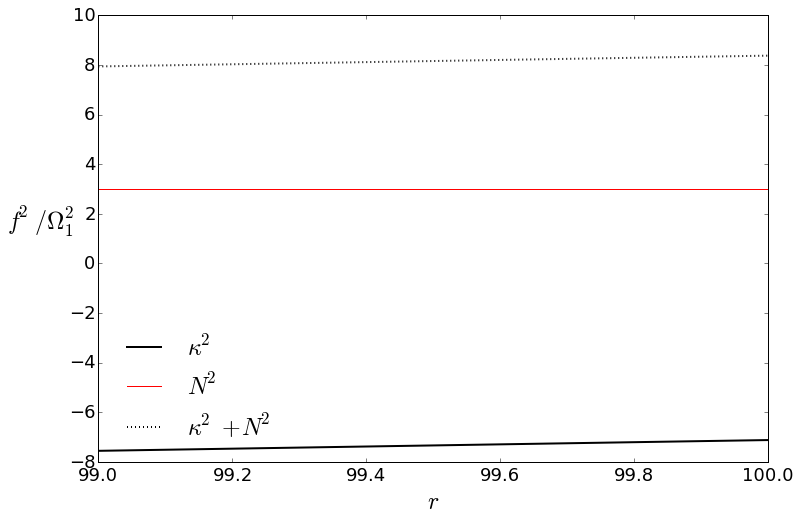

In [63]:
plt.plot(prof_data_ic['scales']['r']['1.0'][:],prof_data_ic['tasks']['epicyclic_freq_sq'][0,0,:]/Omega1**2,label=r'$\kappa^2$',color='k',linewidth=2)
#plt.plot(prof_data_sat['scales']['r']['1.0'][:],prof_data_sat['tasks']['epicyclic_freq_sq'][-1,0,:]/Omega1**2,label='saturated',color='k',linestyle='-.',linewidth=2)
plt.axhline(N2/Omega1**2, color='r',label=r"$N^2$")
plt.plot(prof_data_ic['scales']['r']['1.0'][:],prof_data_ic['tasks']['epicyclic_freq_sq'][0,0,:]/Omega1**2+N2_2/Omega1**2,label=r'$\kappa^2+N^2$',color='k',linestyle=':',linewidth=2)
plt.xlabel(r"$r$",fontsize=24)
plt.ylabel(r"$f^2/\Omega_1^2$",fontsize=24,rotation='horizontal',labelpad=30)
plt.legend(loc='lower left',fontsize=24).draw_frame(False)
a = plt.gca()
a.tick_params(labelsize=18)


In [40]:
#analytical couette flow
eta = 0.99
mu = 0.9425
R1 = 99.
A = -Omega1 * eta**2 * (1 - mu/eta**2)/(1-eta**2)
B = Omega1 * R1**2*(1-mu)/(1-eta**2)

r = data['scales']['r']['1.0'][:]
v_c = r*(A + B/r**2)

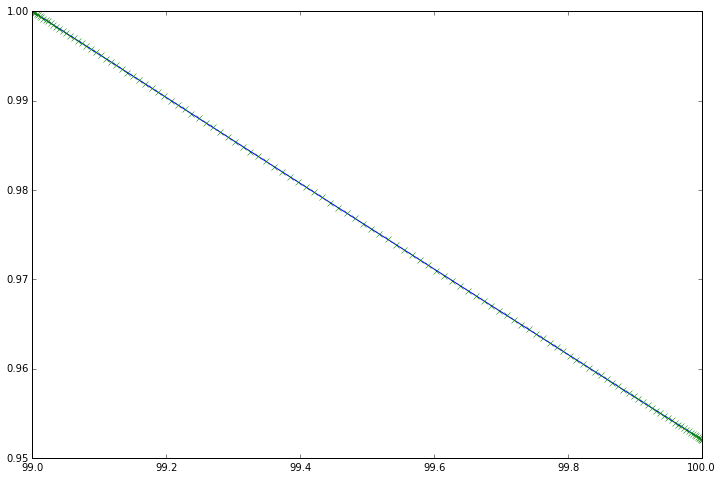

In [44]:
plt.plot(r,(prof_data_ic['tasks']['v_rms'][0,0,:]))
plt.plot(r,v_c,'x')
#plt.plot(data['scales']['r']['1.0'][:],(data['tasks']['v'][2,0,:]))

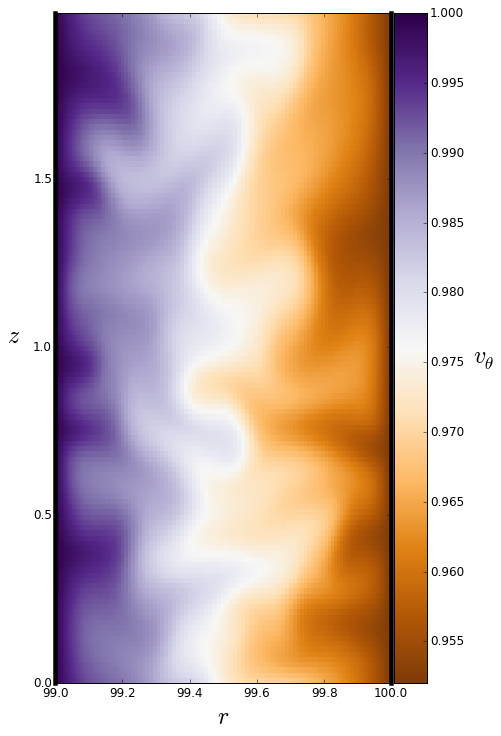

In [47]:
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(111)
img = ax.pcolormesh(data['scales']['r']['1.0'][:], data['scales']['z']['1.0'][:],data['tasks']['v'][-1],cmap='PuOr')
img.axes.axis('image')
#ax.quiver(data['scales']['r']['1.0'][:], data['scales']['z']['1.0'][:],data['tasks']['u'][-1],data['tasks']['w'][-1], width=0.005)
cb = fig.colorbar(img, pad=0.005)
cb_ax = cb.ax
for a in [cb_ax, ax]:
    a.tick_params(labelsize=12)


for axis in ['left','right']:
    ax.spines[axis].set_linewidth(4.5)
    
ax.set_xlabel(r'$r$',fontsize=24)
ax.set_ylabel(r'$z$',rotation='horizontal',fontsize=24,labelpad=20)
cb_ax.set_ylabel(r'$v_{\theta}$',fontsize=24,rotation='horizontal',labelpad=20)

In [43]:
-7.7 + 0.3*15.5

-3.0500000000000007